In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [61]:
runs = pd.read_csv("../csv_logs/log_ffn.csv")

In [62]:
runs.drop(["time", "nesterov"], axis = 1, inplace = True)

In [63]:
count_layers = lambda x: len(x.split(","))
runs["depth"] = runs["layers"].map(count_layers)
runs

,epoch,model,param_count,layers,optimizer,loss,lr,momentum,decay,acc,loss.1,val_acc,val_loss,depth
0,0,ffn0,30730,[<keras.layers.core.Dense object at 0x11d64a49...,<keras.optimizers.SGD object at 0x10dad4e50>,6.490881,0.1,0.9,0.01,0.11868,6.490881,0.1365,6.173112,2
1,1,ffn0,30730,[<keras.layers.core.Dense object at 0x11d64a49...,<keras.optimizers.SGD object at 0x10dad4e50>,6.169778,0.1,0.9,0.01,0.14744,6.169778,0.1544,6.167881,2
2,2,ffn0,30730,[<keras.layers.core.Dense object at 0x11d64a49...,<keras.optimizers.SGD object at 0x10dad4e50>,6.166144,0.1,0.9,0.01,0.16480,6.166144,0.1703,6.165075,2
3,3,ffn0,30730,[<keras.layers.core.Dense object at 0x11d64a49...,<keras.optimizers.SGD object at 0x10dad4e50>,6.163757,0.1,0.9,0.01,0.17626,6.163757,0.1795,6.163137,2
4,4,ffn0,30730,[<keras.layers.core.Dense object at 0x11d64a49...,<keras.optimizers.SGD object at 0x10dad4e50>,6.162014,0.1,0.9,0.01,0.18486,6.162014,0.1891,6.161649,2
5,5,ffn0,30730,[<keras.layers.core.Dense object at 0x11d64a49...,<keras.optimizers.SGD object at 0x10dad4e50>,6.160635,0.1,0.9,0.01,0.19090,6.160635,0.1945,6.160435,2
6,6,ffn0,30730,[<keras.layers.core.Dense object at 0x11d64a49...,<keras.optimizers.SGD object at 0x10dad4e50>,6.159487,0.1,0.9,0.01,0.19494,6.159487,0.1962,6.159406,2
7,7,ffn0,30730,[<keras.layers.core.Dense object at 0x11d64a49...,<keras.optimizers.SGD object at 0x10dad4e50>,6.158501,0.1,0.9,0.01,0.19824,6.158501,0.1986,6.158511,2
8,8,ffn0,30730,[<keras.layers.core.Dense object at 0x11d64a49...,<keras.optimizers.SGD object at 0x10dad4e50>,6.157637,0.1,0.9,0.01,0.20094,6.157637,0.2019,6.157717,2
9,9,ffn0,30730,[<keras.layers.core.Dense object at 0x11d64a49...,<keras.optimizers.SGD object at 0x10dad4e50>,6.156868,0.1,0.9,0.01,0.20278,6.156868,0.2037,6.157006,2


In [64]:
runs.head()
model_performance = runs.groupby("model")["val_acc", "depth"].max()
model_performance["id"] = range(1, model_performance.shape[0] + 1)
model_performance.reset_index(inplace = True)
model_performance

,model,val_acc,depth,id
0,ffn0,0.2037,2,1
1,ffn1,0.1008,4,2
2,ffn2,0.1000,6,3
3,ffn2alt,0.4382,6,4
4,ffn3,0.1000,8,5
5,ffn4,0.4787,8,6
6,ffn5,0.4948,10,7
7,ffn6,0.4961,12,8


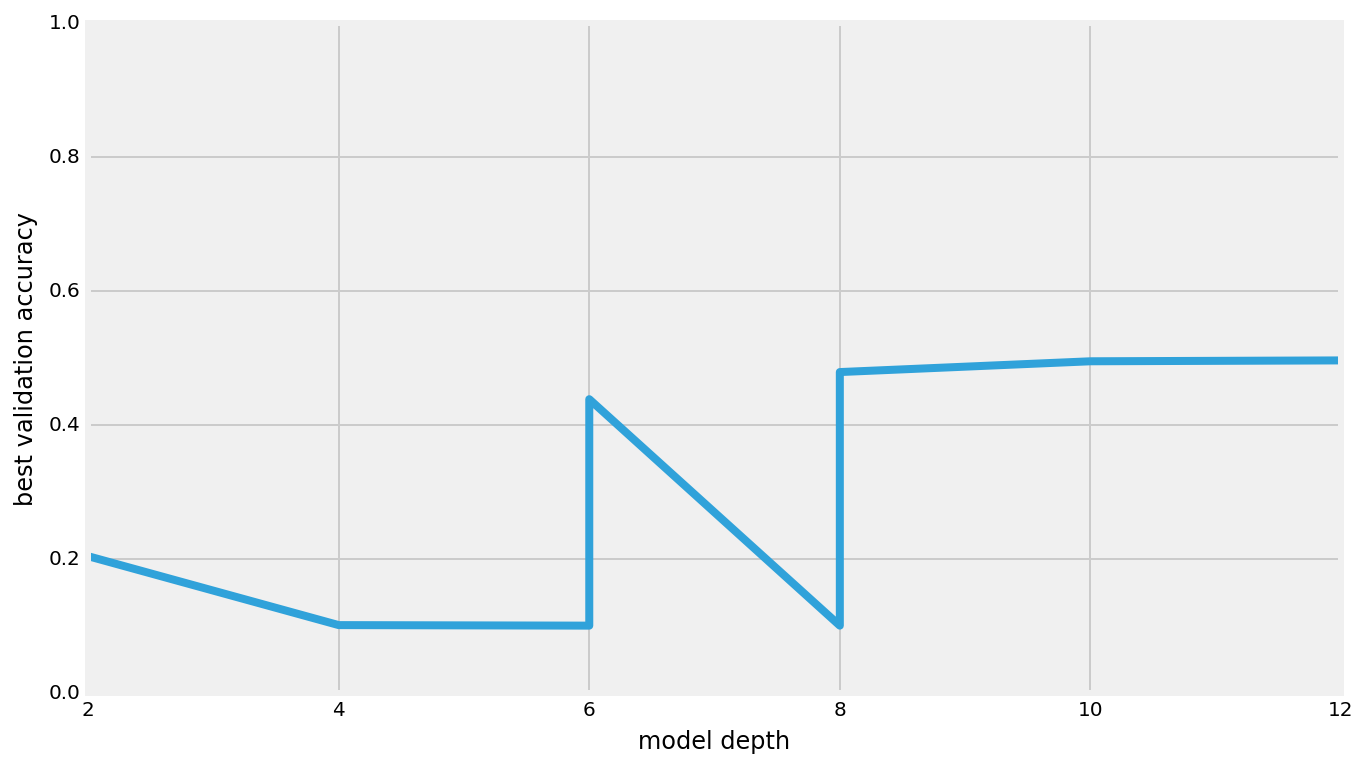

In [65]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(model_performance["depth"], model_performance["val_acc"])
ax.set_ylim([0,1])
ax.set_xlabel('model depth')
ax.set_ylabel('best validation accuracy')
plt.show()

Perameter info:
- All activations ReLu with a final softmax activation
- SGD 
    - intial learning rate of 0.1 with a 10% decay per epoch
    - momentum of 0.9
- The first model (depth 2) was the exception, it had a final ReLu activation, otherwise it was stuck at 10% validation accuracy
- Note: the model that dips at depth 8 had a 256 unit wide penultimate layer, when that was upped to 512 performance returned to ~40%

In [66]:
paramcount = runs.groupby("model")["val_acc", "param_count"].max()
paramcount

,val_acc,param_count
model,,
ffn0,0.2037,30730
ffn1,0.1008,3157002
ffn2,0.1000,4206602
ffn2alt,0.4382,4206602
ffn3,0.1000,4461322
ffn4,0.4787,5256202
ffn5,0.4948,6305802
ffn6,0.4961,6825482


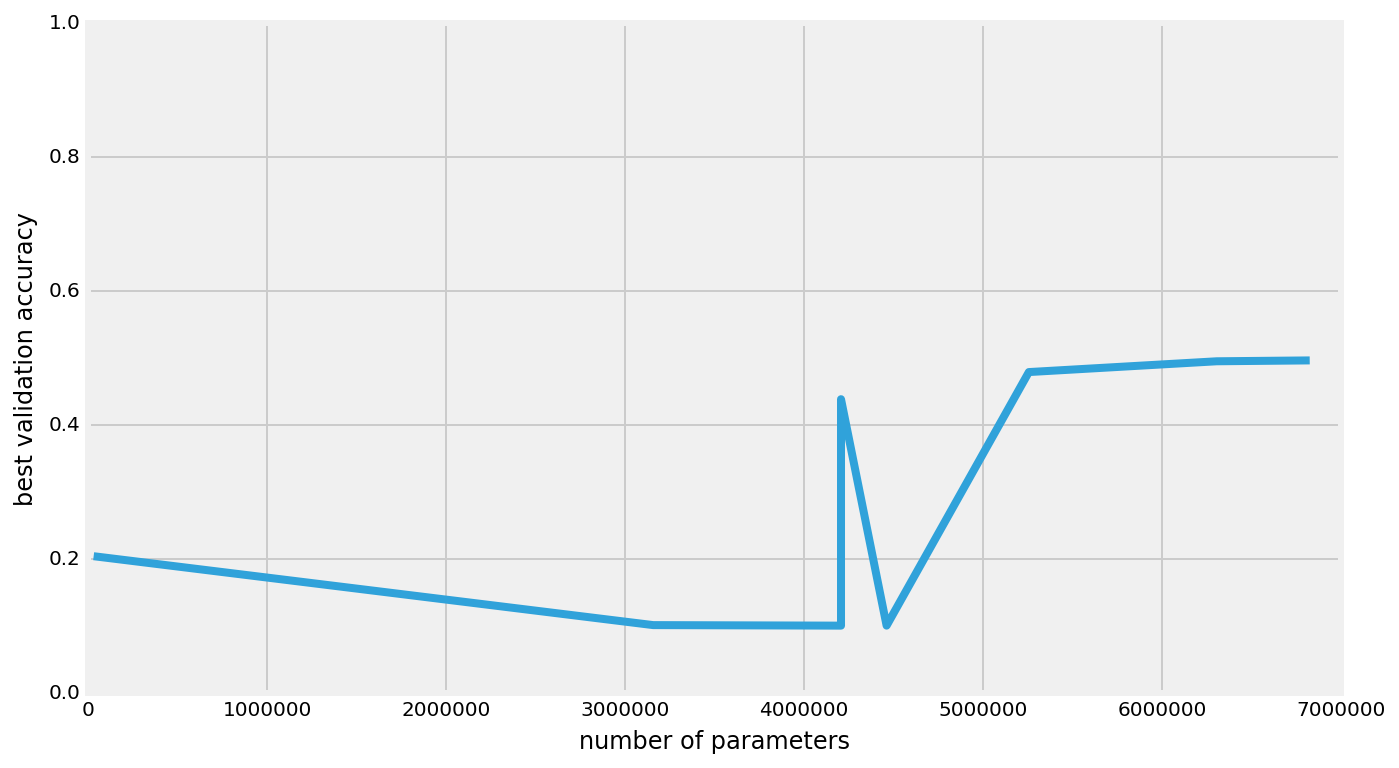

In [59]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(paramcount["param_count"], paramcount["val_acc"])
ax.set_ylim([0,1])
ax.set_xlabel('number of parameters')
ax.set_ylabel('best validation accuracy')
plt.show()

In [3]:
adam = pd.read_csv("/Users/augustus/python/CIFAR/csv_logs/log_ffn_adam.csv")

In [69]:
adam.head()
adam["depth"] = adam["layers"].map(count_layers)

In [75]:
adam_paramcount = adam.groupby("model")["val_acc", "acc", "param_count", "depth"].max()

In [81]:
adam_paramcount

,val_acc,acc,param_count,depth
model,,,,
ffn10,0.4678,0.48454,4206602,6
ffn11,0.4796,0.50562,3411722,6
ffn12,0.4715,0.49468,8401930,6
ffn13,0.1002,0.10200,8401930,6
ffn14,0.4300,0.44544,8401930,6
ffn15,0.4554,0.49788,6313994,4
ffn16,0.4819,0.53616,3157002,4
ffn17,0.4701,0.68720,4206602,6
ffn18,0.4585,0.71052,5256202,8


In [1]:
adam.head()

NameError: name 'adam' is not defined

In [83]:
adam.loc[adam.model == "ffn18", "epoch"]
adam.loc[adam.model == "ffn19", "epoch"]
adam.loc

177     0
178     1
179     2
180     3
181     4
182     5
183     6
184     7
185     8
186     9
187    10
188    11
189    12
190    13
191    14
192    15
193    16
194    17
195    18
196    19
197    20
198    21
199    22
200    23
201    24
Name: epoch, dtype: int64

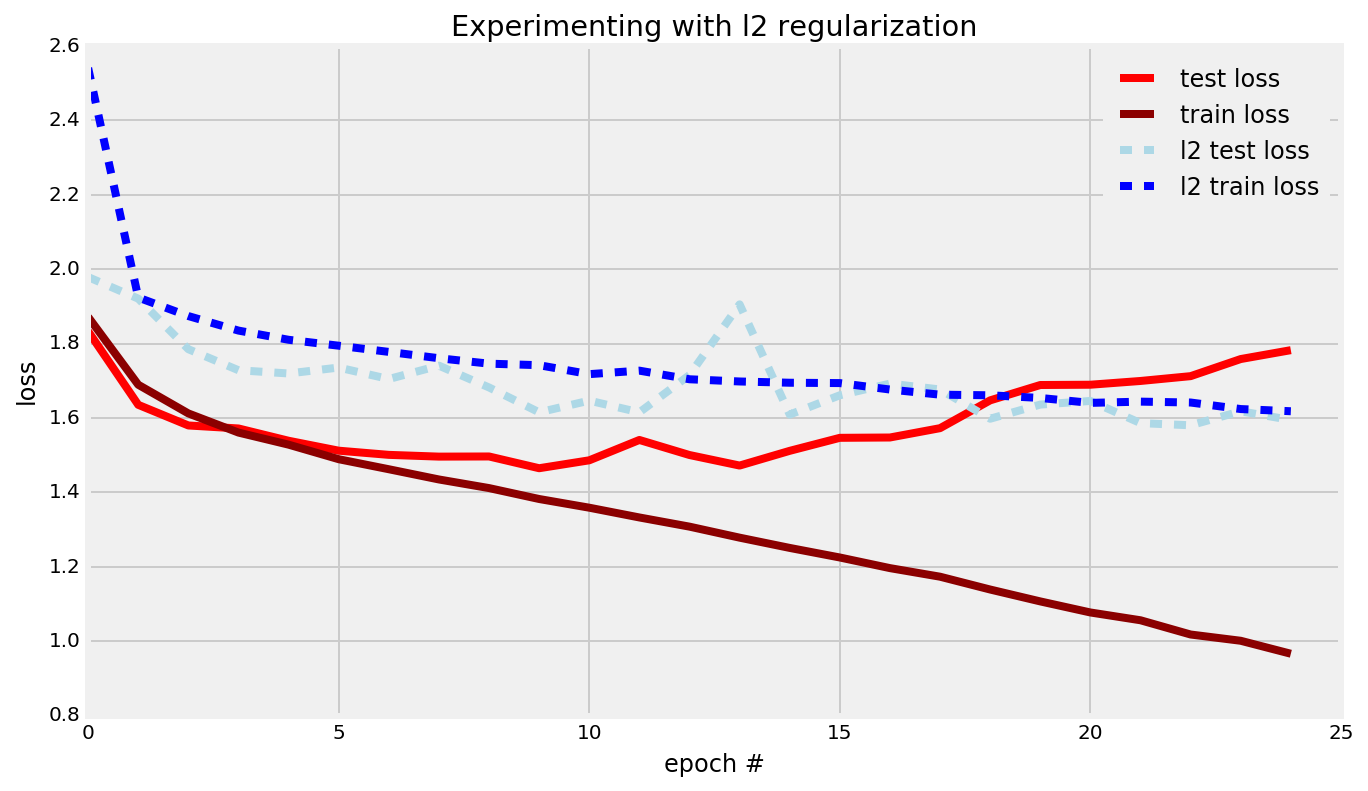

In [134]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(adam.loc[adam.model == "ffn19", "epoch"], adam.loc[adam.model == "ffn19", "val_loss"],  color = "red")
ax.plot(adam.loc[adam.model == "ffn19", "epoch"], adam.loc[adam.model == "ffn19", "loss"], color = "darkred")
ax.plot(adam.loc[adam.model == "ffn23", "epoch"], adam.loc[adam.model == "ffn23", "val_loss"],  color = "lightblue", linestyle = "dashed")
ax.plot(adam.loc[adam.model == "ffn23", "epoch"], adam.loc[adam.model == "ffn23", "loss"], color = "blue" , linestyle = "dashed")
plt.legend(["test loss", "train loss", "l2 test loss", "l2 train loss"])
ax.set_xlabel('epoch #')
ax.set_ylabel('loss')
ax.set_title('Experimenting with l2 regularization')
plt.show()

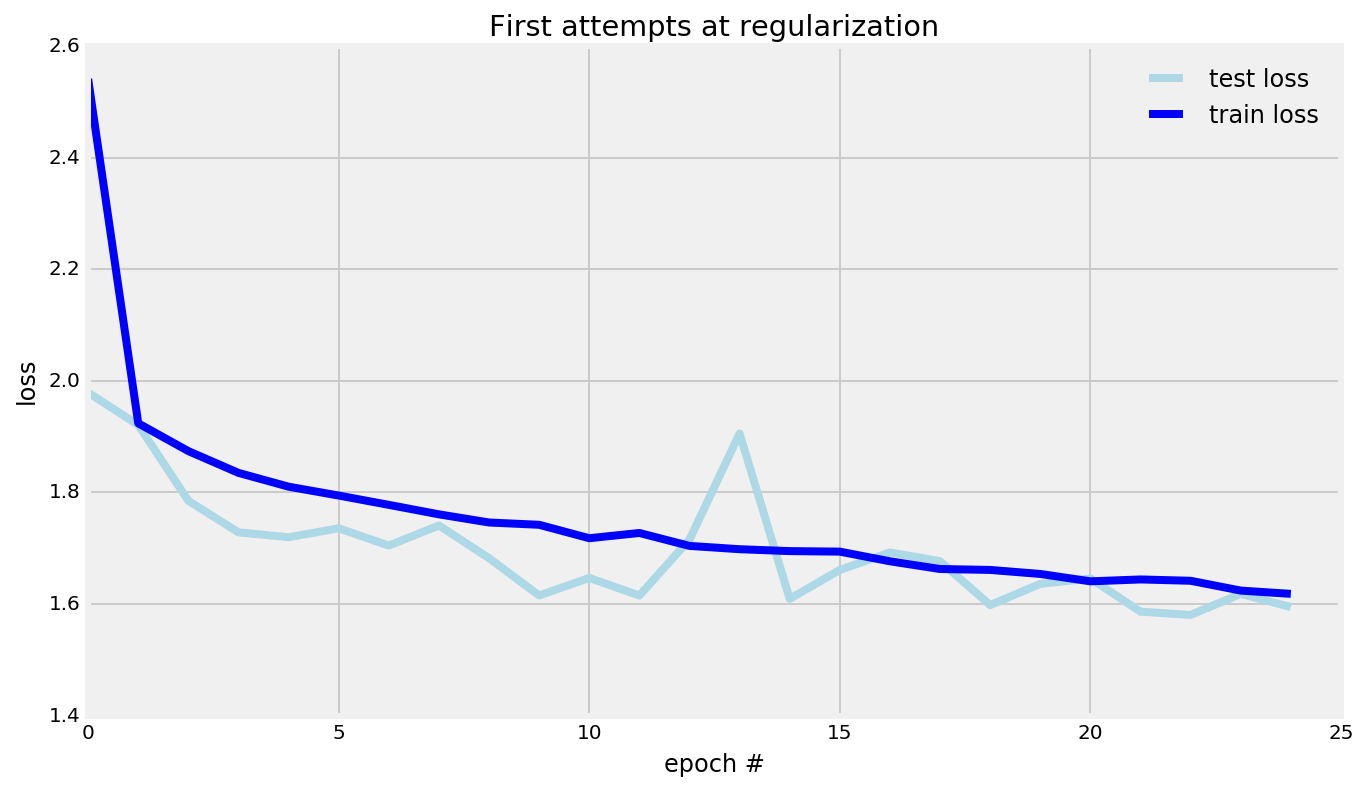

In [110]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(adam.loc[adam.model == "ffn23", "epoch"], adam.loc[adam.model == "ffn23", "val_loss"],  color = "lightblue")
ax.plot(adam.loc[adam.model == "ffn23", "epoch"], adam.loc[adam.model == "ffn23", "loss"], color = "blue")

plt.legend(["test loss", "train loss"])
ax.set_xlabel('epoch #')
ax.set_ylabel('loss')
ax.set_title('First attempts at regularization')
plt.show()

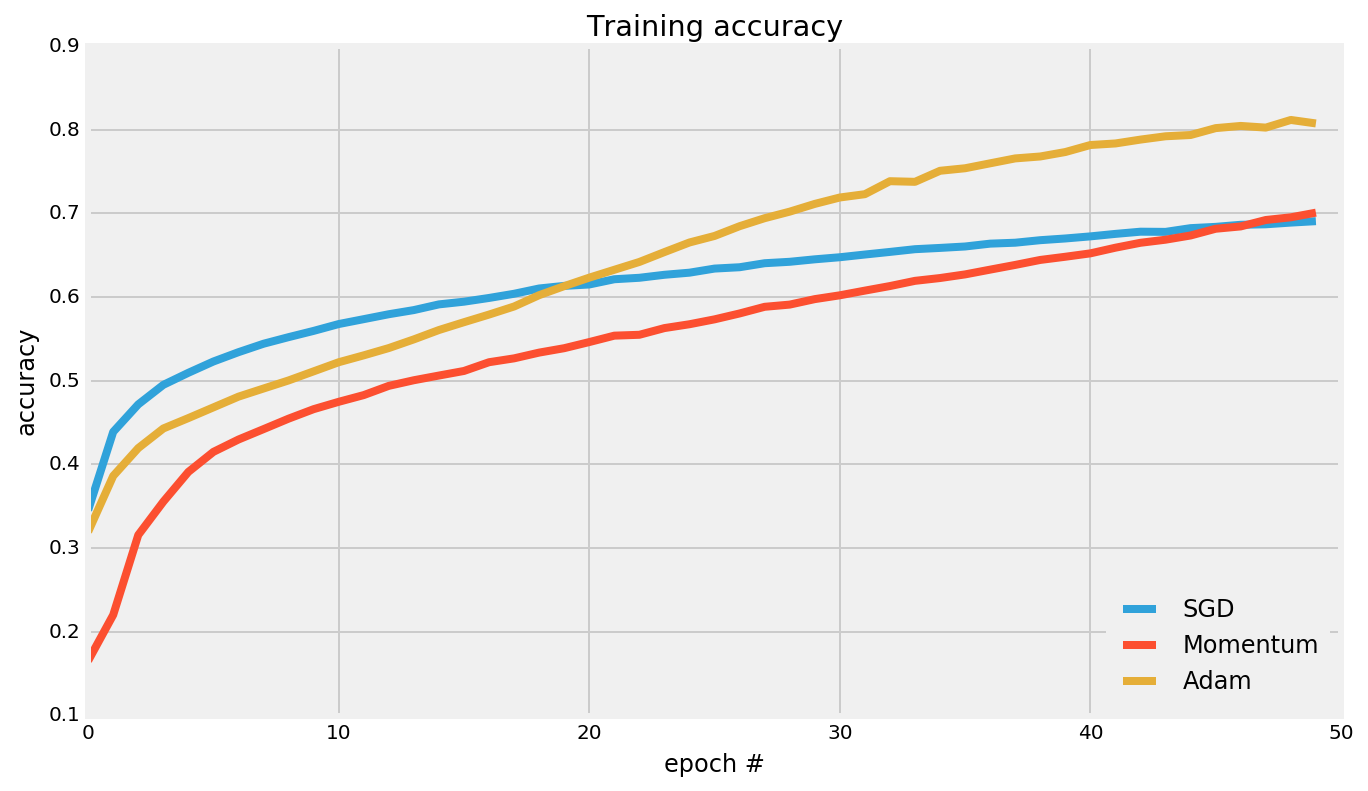

In [124]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(adam.loc[adam.model == "ffn19", "epoch"], adam.loc[adam.model == "ffn19", "val_loss"],  color = "darkred")
ax.plot(adam.loc[adam.model == "ffn19", "epoch"], adam.loc[adam.model == "ffn19", "loss"], color = "red")
ax.plot(adam.loc[adam.model == "ffn23", "epoch"], adam.loc[adam.model == "ffn23", "val_loss"],  color = "lightblue")
ax.plot(adam.loc[adam.model == "ffn23", "epoch"], adam.loc[adam.model == "ffn23", "loss"], color = "blue")
plt.legend(["test loss", "train loss"])
ax.set_xlabel('epoch #')
ax.set_ylabel('loss')
ax.set_title('Overfitting the data with Adam')
plt.show()

NameError: name 'adam' is not defined

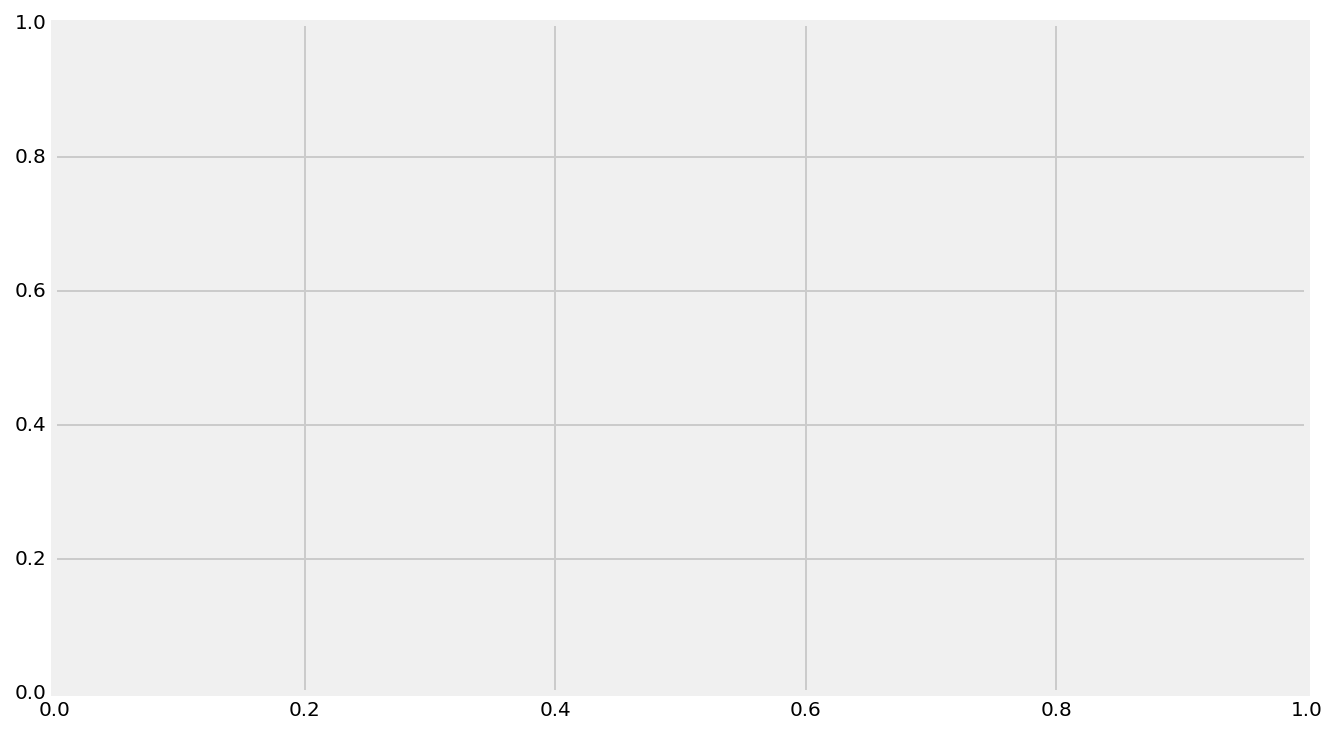

In [3]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(adam.loc[adam.model == "ffn25", "epoch"], adam.loc[adam.model == "ffn25", "loss.1"])
ax.plot(adam.loc[adam.model == "ffn26", "epoch"], adam.loc[adam.model == "ffn26", "loss.1"])
ax.plot(adam.loc[adam.model == "ffn27", "epoch"], adam.loc[adam.model == "ffn27", "val_acc"])
plt.legend(["SGD", "Momentum", "Adam"], loc = "lower right")
ax.set_xlabel('epoch #')
ax.set_ylabel('accuracy')
ax.set_title('Test accuracy')
plt.show()


In [10]:
cnn = pd.read_csv("../csv_logs/log_cnn_v1.csv")
ffn = pd.read_csv("../csv_logs/log_ffn_adam.csv")
ffn.head()
cnn.head()

,epoch,model,param_count,time,layers,optimizer,loss,nesterov,lr,momentum,decay,acc,loss.1,val_acc,val_loss
0,0,cnn2,4200842,10 Nov 2016 14:33:21,[<keras.layers.convolutional.Convolution2D obj...,<keras.optimizers.SGD object at 0x12157b750>,1.712925,True,0.01,0.9,0.010000,0.39556,1.712925,0.4529,1.546871
1,0,cnn3,4200842,10 Nov 2016 14:36:52,[<keras.layers.convolutional.Convolution2D obj...,<keras.optimizers.SGD object at 0x125813750>,1.491322,True,0.01,0.9,0.000667,0.46620,1.491322,0.5640,1.225027
2,1,cnn3,4200842,10 Nov 2016 14:39:26,[<keras.layers.convolutional.Convolution2D obj...,<keras.optimizers.SGD object at 0x125813750>,1.145919,True,0.01,0.9,0.000667,0.59346,1.145919,0.5948,1.137168
3,2,cnn3,4200842,10 Nov 2016 14:42:12,[<keras.layers.convolutional.Convolution2D obj...,<keras.optimizers.SGD object at 0x125813750>,1.004715,True,0.01,0.9,0.000667,0.64652,1.004715,0.6312,1.053372
4,3,cnn3,4200842,10 Nov 2016 14:44:45,[<keras.layers.convolutional.Convolution2D obj...,<keras.optimizers.SGD object at 0x125813750>,0.899484,True,0.01,0.9,0.000667,0.68526,0.899484,0.6368,1.038980


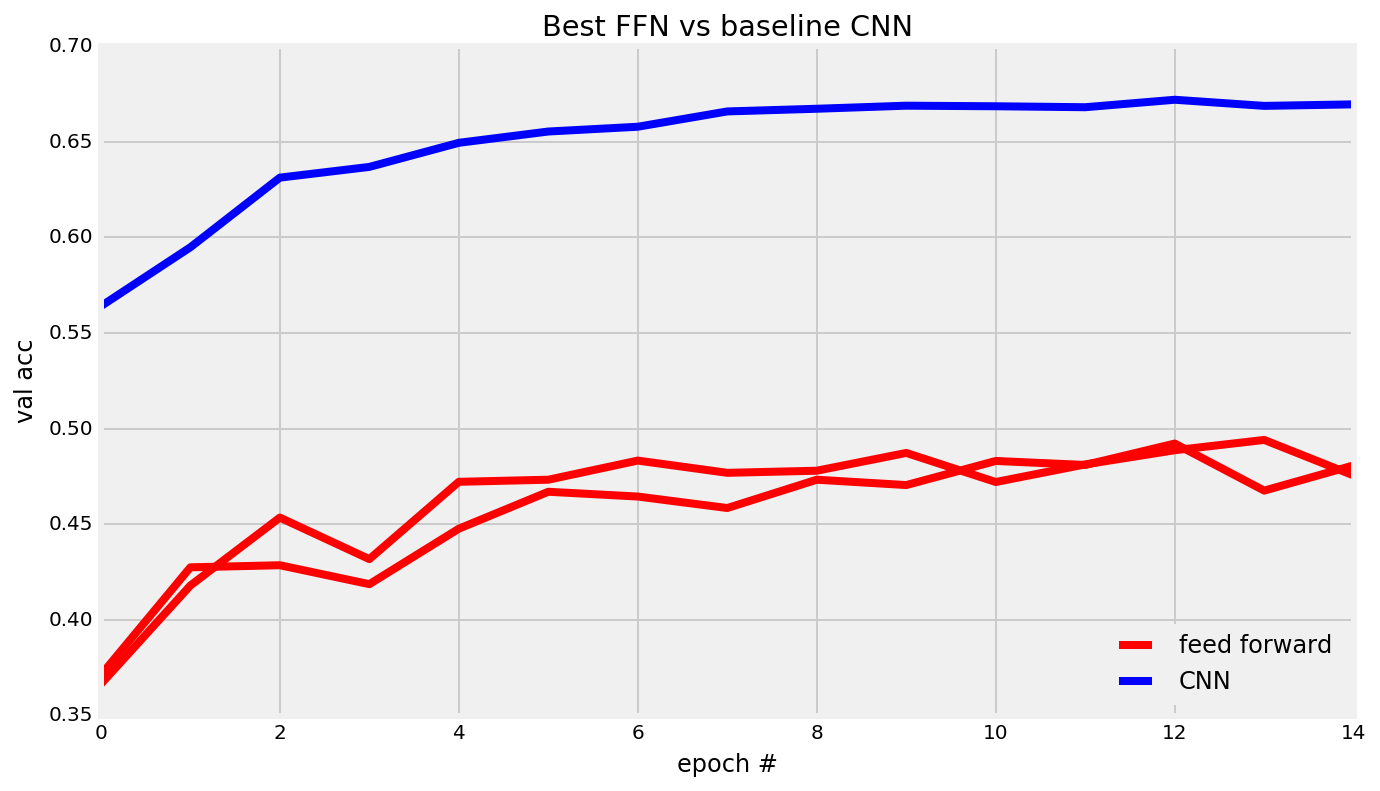

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(adam.loc[adam.model == "ffn39", "epoch"][:15], adam.loc[adam.model == "ffn39", "val_acc"][:15],  color = "red")
ax.plot(cnn.loc[cnn.model == "cnn3", "epoch"], cnn.loc[cnn.model == "cnn3", "val_acc"], color = "blue")
ax.plot(adam.loc[adam.model == "ffn36", "epoch"][:15], adam.loc[adam.model == "ffn36", "val_acc"][:15],  color = "red")

plt.legend(["feed forward", "CNN"], loc = "lower right")
ax.set_xlabel('epoch #')
ax.set_ylabel('val acc')
ax.set_title('Best FFN vs baseline CNN')
plt.show()

### interview questions

In [56]:
case1 = np.random.randint(1, 100, size = 10)
case1 = list(case1)
case1.sort()
case1=case1[::-1]

In [72]:
total = np.sum(case1)
counter = 0

for value in range(len(case1)):
    while total >= case1[value]:
        total -= case1[value]
        counter += 1
if total != 0:
    print "-1"

abc = [1, 2, 3]
abc.sort(reverse = True)
abc

-1


[3, 2, 1]

In [73]:
def addsum(values):
    values.sort(reverse = True)
    total = np.sum(values)
    coins = []
    
    for value in range(len(values)):
        while total >= values[value]:
            total -= values[value]
            coins.append(values[value])
    if total != 0:
        return -1
    else:
        return counter
    
    

In [81]:
coins = [1, 3, 5]

In [91]:
def min_coins(coins, amt):
    cache = {0:0}
    for int_sum in range(1, amt + 1):
        best_coins_count = float("inf")
        for coin in coins:
            tmp_sum = int_sum - coin
            if tmp_sum < 0:
                break
            coins_count = 1 + cache[tmp_sum]
            if best_coins_count > coins_count:
                best_coins_count = coins_count
        cache[int_sum] = best_coins_count
    return cache[amt]
    

In [103]:
min_coins([2, 3, 5,11], 32)
    

4

In [ ]:
"""
coins: 1, 3, 5
cache = {0:0,
1:1,
2:2,
3:1,
4:2,
5:1}

1, 2, 3, 4, 5

"""